In [76]:
!pip install gensim
!pip install python-Levenshtein

     ---------------------------------------- 0.0/23.3 MB ? eta -:--:--
      --------------------------------------- 0.5/23.3 MB 5.4 MB/s eta 0:00:05
     ---- ----------------------------------- 2.9/23.3 MB 10.3 MB/s eta 0:00:02
     --------- ------------------------------ 5.2/23.3 MB 10.9 MB/s eta 0:00:02
     ------------- -------------------------- 7.6/23.3 MB 11.2 MB/s eta 0:00:02
     --------------- ------------------------ 8.9/23.3 MB 10.0 MB/s eta 0:00:02
     -------------------- ------------------ 12.3/23.3 MB 11.4 MB/s eta 0:00:01
     ---------------------- ---------------- 13.4/23.3 MB 10.3 MB/s eta 0:00:01
     ------------------------ -------------- 14.7/23.3 MB 10.7 MB/s eta 0:00:01
     --------------------------- ------------ 16.0/23.3 MB 9.4 MB/s eta 0:00:01
     ----------------------------- ---------- 17.0/23.3 MB 9.0 MB/s eta 0:00:01
     ------------------------------- -------- 18.1/23.3 MB 8.7 MB/s eta 0:00:01
     -------------------------------- ------- 19.

  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [21 lines of output]
  + D:\Projects\fake news detection\fake\Scripts\python.exe C:\Users\Bhupi\AppData\Local\Temp\pip-install-ig7u0rbs\numpy_4e715a34e8fc41e298083f178ea7b14d\vendored-meson\meson\meson.py setup C:\Users\Bhupi\AppData\Local\Temp\pip-install-ig7u0rbs\numpy_4e715a34e8fc41e298083f178ea7b14d C:\Users\Bhupi\AppData\Local\Temp\pip-install-ig7u0rbs\numpy_4e715a34e8fc41e298083f178ea7b14d\.mesonpy-n_cchzg2 -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\Bhupi\AppData\Local\Temp\pip-install-ig7u0rbs\numpy_4e715a34e8fc41e298083f178ea7b14d\.mesonpy-n_cchzg2\meson-python-native-file.ini
  The Meson build system
  Version: 1.2.99
  Source dir: C:\Users\Bhupi\AppData\Local\Temp\pip-install-ig7u0rbs\numpy_4e715a34e8fc41e298083f178ea7b14d
  Build dir: C:\Users\Bhupi\AppData\Local\Temp\pip-install-ig7u0rbs\numpy_4e715a34e8fc41e298083f1

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------------------------- -------------- 1.0/1.6 MB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 3.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import numpy as np

In [5]:
fake_news = pd.read_csv('D:\\Projects\\fake news detection\\archive\\News _dataset\\fake.csv')
real_news = pd.read_csv('D:\\Projects\\fake news detection\\archive\\News _dataset\\true.csv')

In [6]:
fake_news['label'] = 'fake'
real_news['label'] = 'real'
combined_news = pd.concat([fake_news, real_news], ignore_index=True)
combined_news = combined_news.sample(frac=1, random_state=42).reset_index(drop=True)
combined_news.to_csv('news.csv', index=False)

In [9]:
news = pd.read_csv("./news.csv")


In [10]:
news.head(10)

,title,text,subject,date,label,num_char,num_words,num_sentences
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,2017-02-13,fake,1028,181,5
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,2017-04-05,real,4820,901,27
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,2017-09-27,real,1848,349,14
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,2017-05-22,fake,1244,205,9
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,2016-06-24,real,3137,604,21
5,Paul Ryan Responds To Dem’s Sit-In On Gun Con...,"On Wednesday, Democrats took a powerful stance...",News,2016-06-22,fake,2130,378,7
6,AWESOME! DIAMOND AND SILK Rip Into The Press: ...,President Trump s rally in FL on Saturday was ...,Government News,2017-02-19,fake,935,177,8
7,STAND UP AND CHEER! UKIP Party Leader SLAMS Ge...,He s been Europe s version of the outspoken Te...,left-news,2016-03-08,fake,1606,338,15
8,North Korea shows no sign it is serious about ...,WASHINGTON (Reuters) - The State Department sa...,worldnews,2017-12-13,real,1030,184,4
9,Trump signals willingness to raise U.S. minimu...,(This version of the story corrects the figur...,politicsNews,2016-05-04,real,690,152,3


In [4]:
df = news.copy()
df['date'] = pd.to_datetime(news['date'], errors='coerce')

In [5]:
df.isna().sum()
# df = df.dropna(how='any',axis=0) 

title          0
text           0
subject        0
date       33030
label          0
dtype: int64

In [6]:
for i in range(4):
    df.update(pd.to_datetime(news[df['date'].isnull()]['date'], errors='coerce'), overwrite=False)

C:\Users\Bhupi\AppData\Local\Temp\ipykernel_23048\543551339.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.update(pd.to_datetime(news[df['date'].isnull()]['date'], errors='coerce'), overwrite=False)
C:\Users\Bhupi\AppData\Local\Temp\ipykernel_23048\543551339.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.update(pd.to_datetime(news[df['date'].isnull()]['date'], errors='coerce'), overwrite=False)


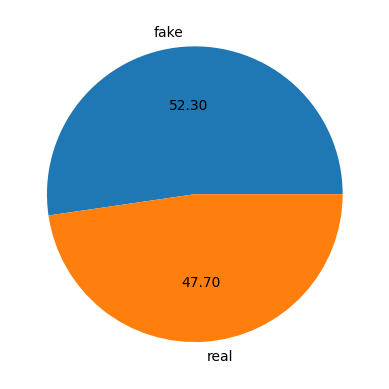

label
fake    23481
real    21417
Name: count, dtype: int64

In [11]:
plt.pie(df['label'].value_counts(), labels=['fake', 'real'], autopct="%0.2f")
plt.show()
df['label'].value_counts()

In [8]:
# df['num_char'] = df['text'].apply(len)
# df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
# df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
# df.to_csv('news.csv', index=False)

In [141]:
df.head()

,title,text,subject,date,label,num_char,num_words,num_sentences
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,2017-02-13,fake,1028,181,5
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,2017-04-05,real,4820,901,27
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,2017-09-27,real,1848,349,14
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,2017-05-22,fake,1244,205,9
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,2016-06-24,real,3137,604,21


In [12]:
df[df['label'] == 'real'][['num_char','num_words','num_sentences']].describe()


,num_char,num_words,num_sentences
count,21417.000000,21417.000000,21417.000000
mean,2383.278517,435.253957,14.819536
std,1684.835730,311.384911,11.367958
min,1.000000,0.000000,0.000000
25%,914.000000,168.000000,6.000000
50%,2222.000000,404.000000,13.000000
75%,3237.000000,589.000000,20.000000
max,29781.000000,5979.000000,321.000000


In [13]:
df[df['label'] == 'fake'][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,23481.000000,23481.000000,23481.000000
mean,2547.396235,470.039010,14.919509
std,2532.884399,457.154988,13.792339
min,1.000000,0.000000,0.000000
25%,1433.000000,266.000000,7.000000
50%,2166.000000,403.000000,13.000000
75%,3032.000000,562.000000,19.000000
max,51794.000000,9958.000000,288.000000


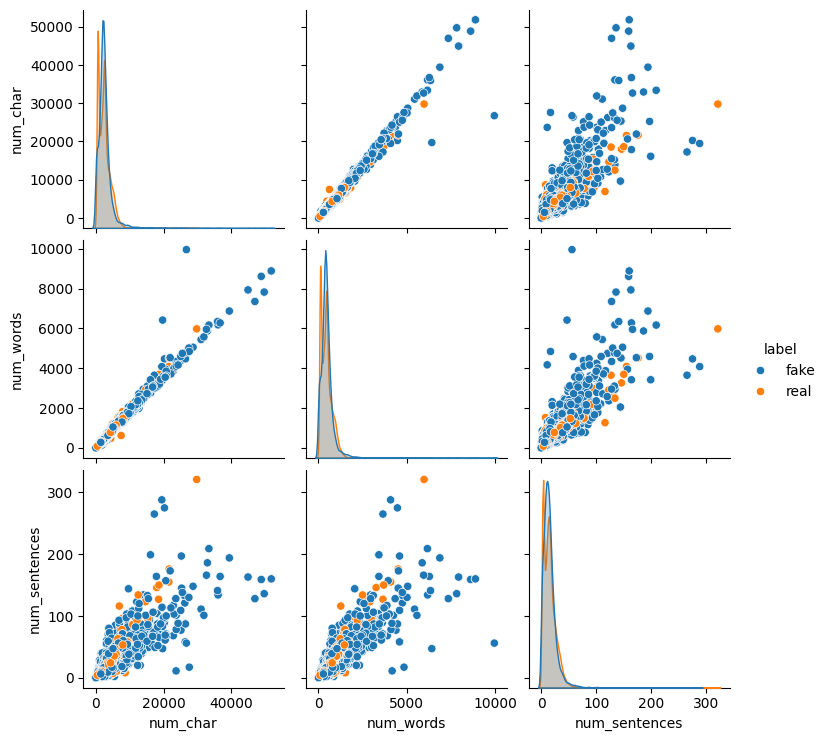

In [14]:
sns.pairplot(df, hue='label')

In [15]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  #removes punctuation
    text = re.sub(r'\d+', '', text)  #removes numbers
    text = text.lower()  #turns everything to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words]) #gets rid of stop words
    return text

df['clean_text'] = df['text'].apply(clean_text)
# df.to_csv('news.csv', index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bhupi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text(0.5, 1.0, 'Common Words in Real News')

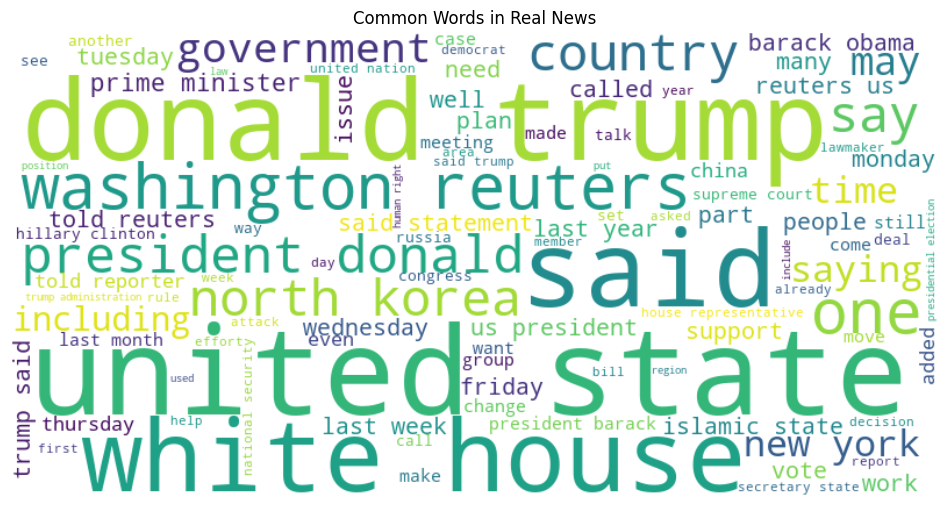

In [16]:
real_text = ' '.join(df[df['label'] == 'real']['clean_text'])
real_wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(real_text)

plt.figure(figsize=(12, 8))
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Real News')

Text(0.5, 1.0, 'Common Words in Fake News')

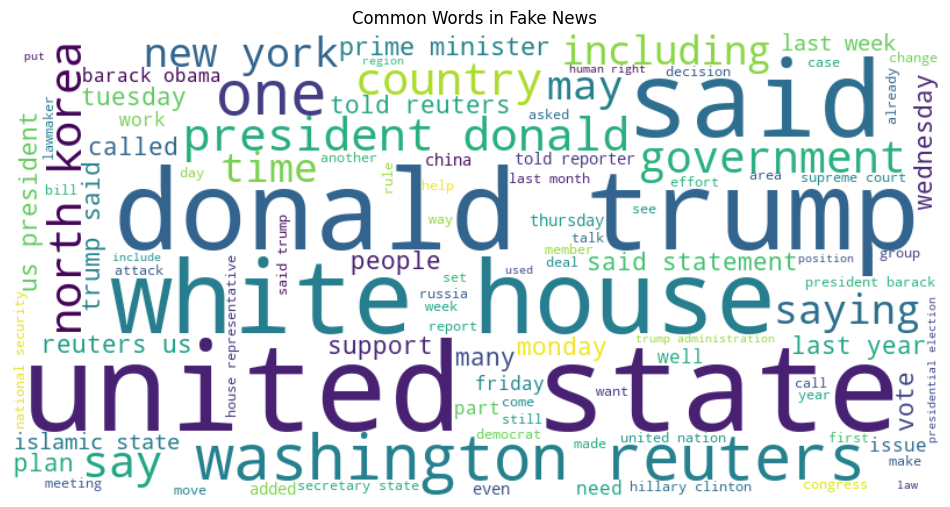

In [17]:
fake_text = ' '.join(df[df['label'] == 'fake']['clean_text'])
fake_wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(real_text)

plt.figure(figsize=(12, 8))
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Fake News')

In [46]:
# df['is_real'] = df['label'].apply(lambda x: 1 if x == 'real' else 0)

In [18]:
tfidf = TfidfVectorizer(max_features=3000)

In [33]:
X = tfidf.fit_transform(df['clean_text']).toarray()

In [34]:
tfidf.get_feature_names_out()

array(['abc', 'abe', 'ability', ..., 'zero', 'zika', 'zone'],
      shape=(3000,), dtype=object)

In [49]:
y = df['is_real'].values

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [58]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, ConfusionMatrixDisplay

In [53]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [52]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
y_pred1

array([1, 0, 0, ..., 1, 1, 0], shape=(8980,))

In [54]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9113585746102449
[[4238  464]
 [ 332 3946]]
0.8947845804988662


In [55]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9339643652561247
[[4416  286]
 [ 307 3971]]
0.9328165374677002


In [56]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9670378619153674
[[4540  162]
 [ 134 4144]]
0.9623780771017185


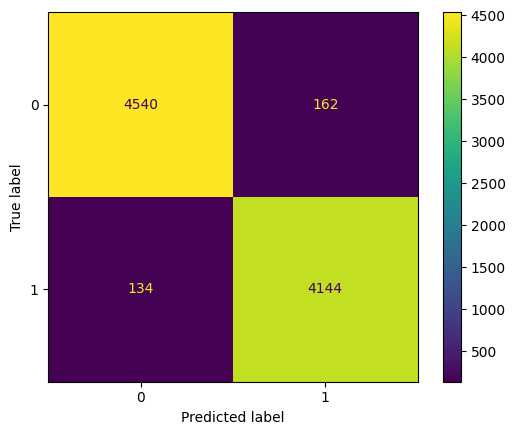

In [60]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred3),
                              display_labels=bnb.classes_)
disp.plot()

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [64]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [69]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [66]:

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [67]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9923162583518931, 0.9893048128342246)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

<Figure size 1400x600 with 0 Axes>

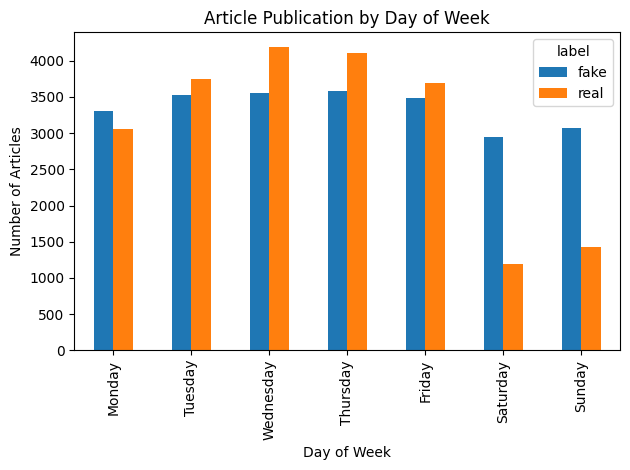

In [82]:
plt.figure(figsize=(14, 6))
weekday_counts = df.groupby([df['date'].dt.weekday, 'label']).size().unstack()
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts.plot(kind='bar')
plt.title('Article Publication by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Articles')
plt.tight_layout()

In [73]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)



,Algorithm,Accuracy,Precision
7,BgC,0.997996,0.998596
5,RF,0.998107,0.997897
10,xgb,0.997773,0.997895
6,AdaBoost,0.995991,0.994867
3,DT,0.996325,0.994640
9,GBDT,0.996102,0.994177
4,LR,0.994989,0.994163
8,ETC,0.992650,0.989767
0,SVC,0.992316,0.989305
1,KN,0.707684,0.937533


In [74]:
performance_df.sort_values('Accuracy',ascending=False)

,Algorithm,Accuracy,Precision
5,RF,0.998107,0.997897
7,BgC,0.997996,0.998596
10,xgb,0.997773,0.997895
3,DT,0.996325,0.994640
9,GBDT,0.996102,0.994177
6,AdaBoost,0.995991,0.994867
4,LR,0.994989,0.994163
8,ETC,0.992650,0.989767
0,SVC,0.992316,0.989305
2,NB,0.933964,0.932817


In [75]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
# pickle.dump(mnb,open('model.pkl','wb'))

In [76]:
pickle.dump(bc,open('modelBC.pkl','wb'))
pickle.dump(rfc,open('modelRF.pkl','wb'))


In [83]:
rfc.predict(tfidf.transform(["US Revokes Temporary Status Of 5 Lakh Migrants, To Face Deportation Soon"]).toarray())

array([0])

In [101]:
from sklearn import tree
print(tree.export_text(rfc.estimators_[0]))

|--- feature_124 <= 0.03
|   |--- feature_2176 <= 0.03
|   |   |--- feature_433 <= 0.06
|   |   |   |--- feature_2779 <= 0.01
|   |   |   |   |--- feature_2803 <= 0.03
|   |   |   |   |   |--- feature_1843 <= 0.02
|   |   |   |   |   |   |--- feature_1956 <= 0.00
|   |   |   |   |   |   |   |--- feature_2053 <= 0.01
|   |   |   |   |   |   |   |   |--- feature_2538 <= 0.02
|   |   |   |   |   |   |   |   |   |--- feature_2921 <= 0.02
|   |   |   |   |   |   |   |   |   |   |--- feature_516 <= 0.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 153
|   |   |   |   |   |   |   |   |   |   |--- feature_516 >  0.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- feature_2921 >  0.02
|   |   |   |   |   |   |   |   |   |   |--- feature_932 <= 0.02
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 24
|   |   |   |   |   |   |   |   |   |   |--- feature_932 >  0.02
|   | 

In [31]:
X = df['clean_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142857)

In [8]:
vectorizer = TfidfVectorizer(max_features=5000)

In [12]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [33]:
X_test


37091    donald trump held bizarre press conference tue...
7722     frankfurt reuters prosecutors pressured swiss ...
32380    trump made campaign ceo steve bannon new chief...
28408    edinburgh reuters offices scotland devolved pa...
30722    senator john mccain wanted achieve morning mon...
                               ...                        
8352     somebody needs point incompetent gun grabber c...
7463     group christians planned attend next week reas...
35063    united nations reuters united states wants cut...
14158    berlin reuters us president donald trump calle...
39524    johannesburg reuters south africa justice mini...
Name: text, Length: 8980, dtype: object

pandas.core.series.Series

In [19]:
te = pd.DataFrame(X_train_vectorized, y_train);

In [27]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [30]:
predictions = model.predict(X_test_vectorized) #stores alll of the predictions into a variable
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}") #compares with actual results
print(classification_report(y_test, predictions))

Accuracy: 0.94
              precision    recall  f1-score   support

        fake       0.95      0.94      0.94      4834
        real       0.93      0.94      0.94      4146

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [36]:
newtext = vectorizer.transform(["today Somebody helped someone"]);
model.predict(newtext)

array(['fake'], dtype='<U4')

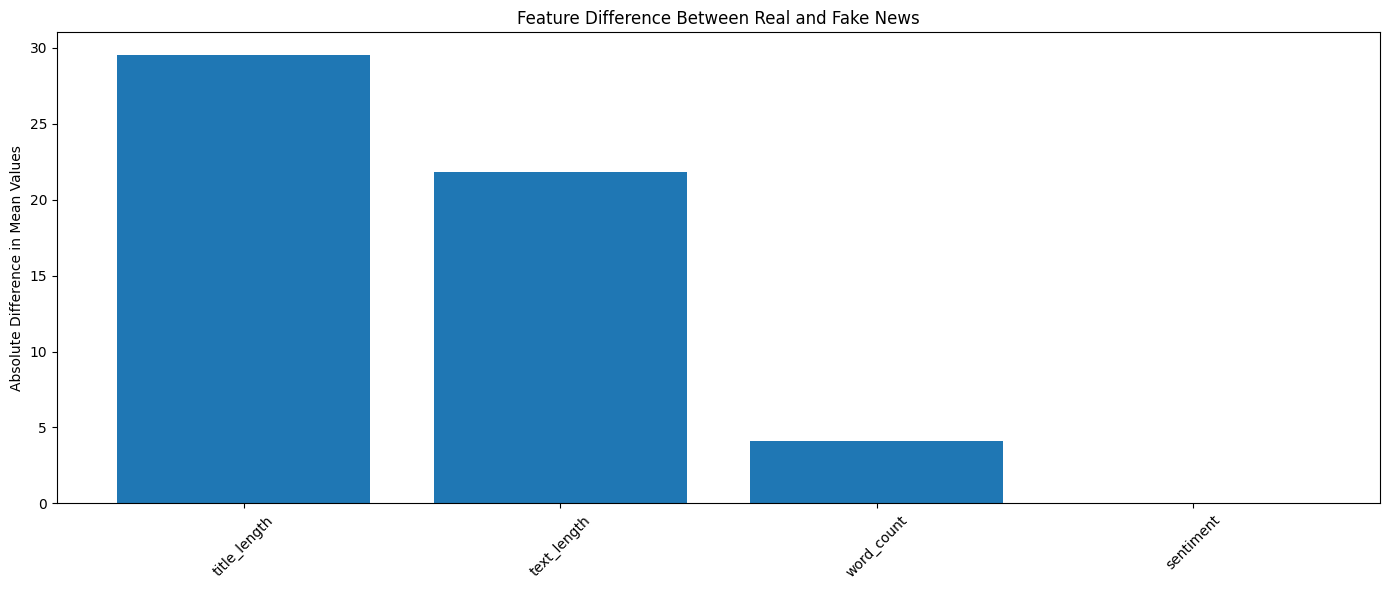

In [81]:
feature_list = ['title_length', 'text_length', 'word_count',  'sentiment']

# Create a dataframe for feature differences
fs = {'feature':[],'real_mean': [], 'fake_mean': [], 'difference':[]}


for feature in feature_list:
    real_mean = df[df['label'] == 'real'][feature].mean()
    fake_mean = df[df['label'] == 'fake'][feature].mean()
    difference = abs(real_mean - fake_mean)
    fs['feature'].append(feature)
    fs['real_mean'].append(real_mean)
    fs['fake_mean'].append(fake_mean)
    fs['difference'].append(difference)
    
    
    # feature_summary = feature_summary.append({
    #     'feature': feature,
    #     'real_mean': real_mean,
    #     'fake_mean': fake_mean,
    #     'difference': difference
    # }, ignore_index=True)
feature_summary = pd.DataFrame(fs)
feature_summary = feature_summary.sort_values('difference', ascending=False)

plt.figure(figsize=(14, 6))
plt.bar(feature_summary['feature'], feature_summary['difference'])
plt.title('Feature Difference Between Real and Fake News')
plt.xticks(rotation=45)
plt.ylabel('Absolute Difference in Mean Values')
plt.tight_layout()